# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
import networkx as nx

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [4]:
from src.graph import NetworkGraph
from src.flows import TimeNetwork
from src.flows import MCFlow

# Test of time expanded network

##### Create a flatland network

In [5]:
number_agents = 10

size_side = 20
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=20, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()

env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)


matrix_rail = np.array(env.rail.grid.tolist())
flatlandNetwork = NetworkGraph(matrix_rail,[(0,1)],[(1,0)])

cycles detected in NetworkGraph, this may be due to the fact that endpoint can be used to do 180 turn


In [15]:
sources = []
sinks = []
for agent in env.agents:
    sources.append(agent.initial_position)
    sinks.append(agent.target)

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


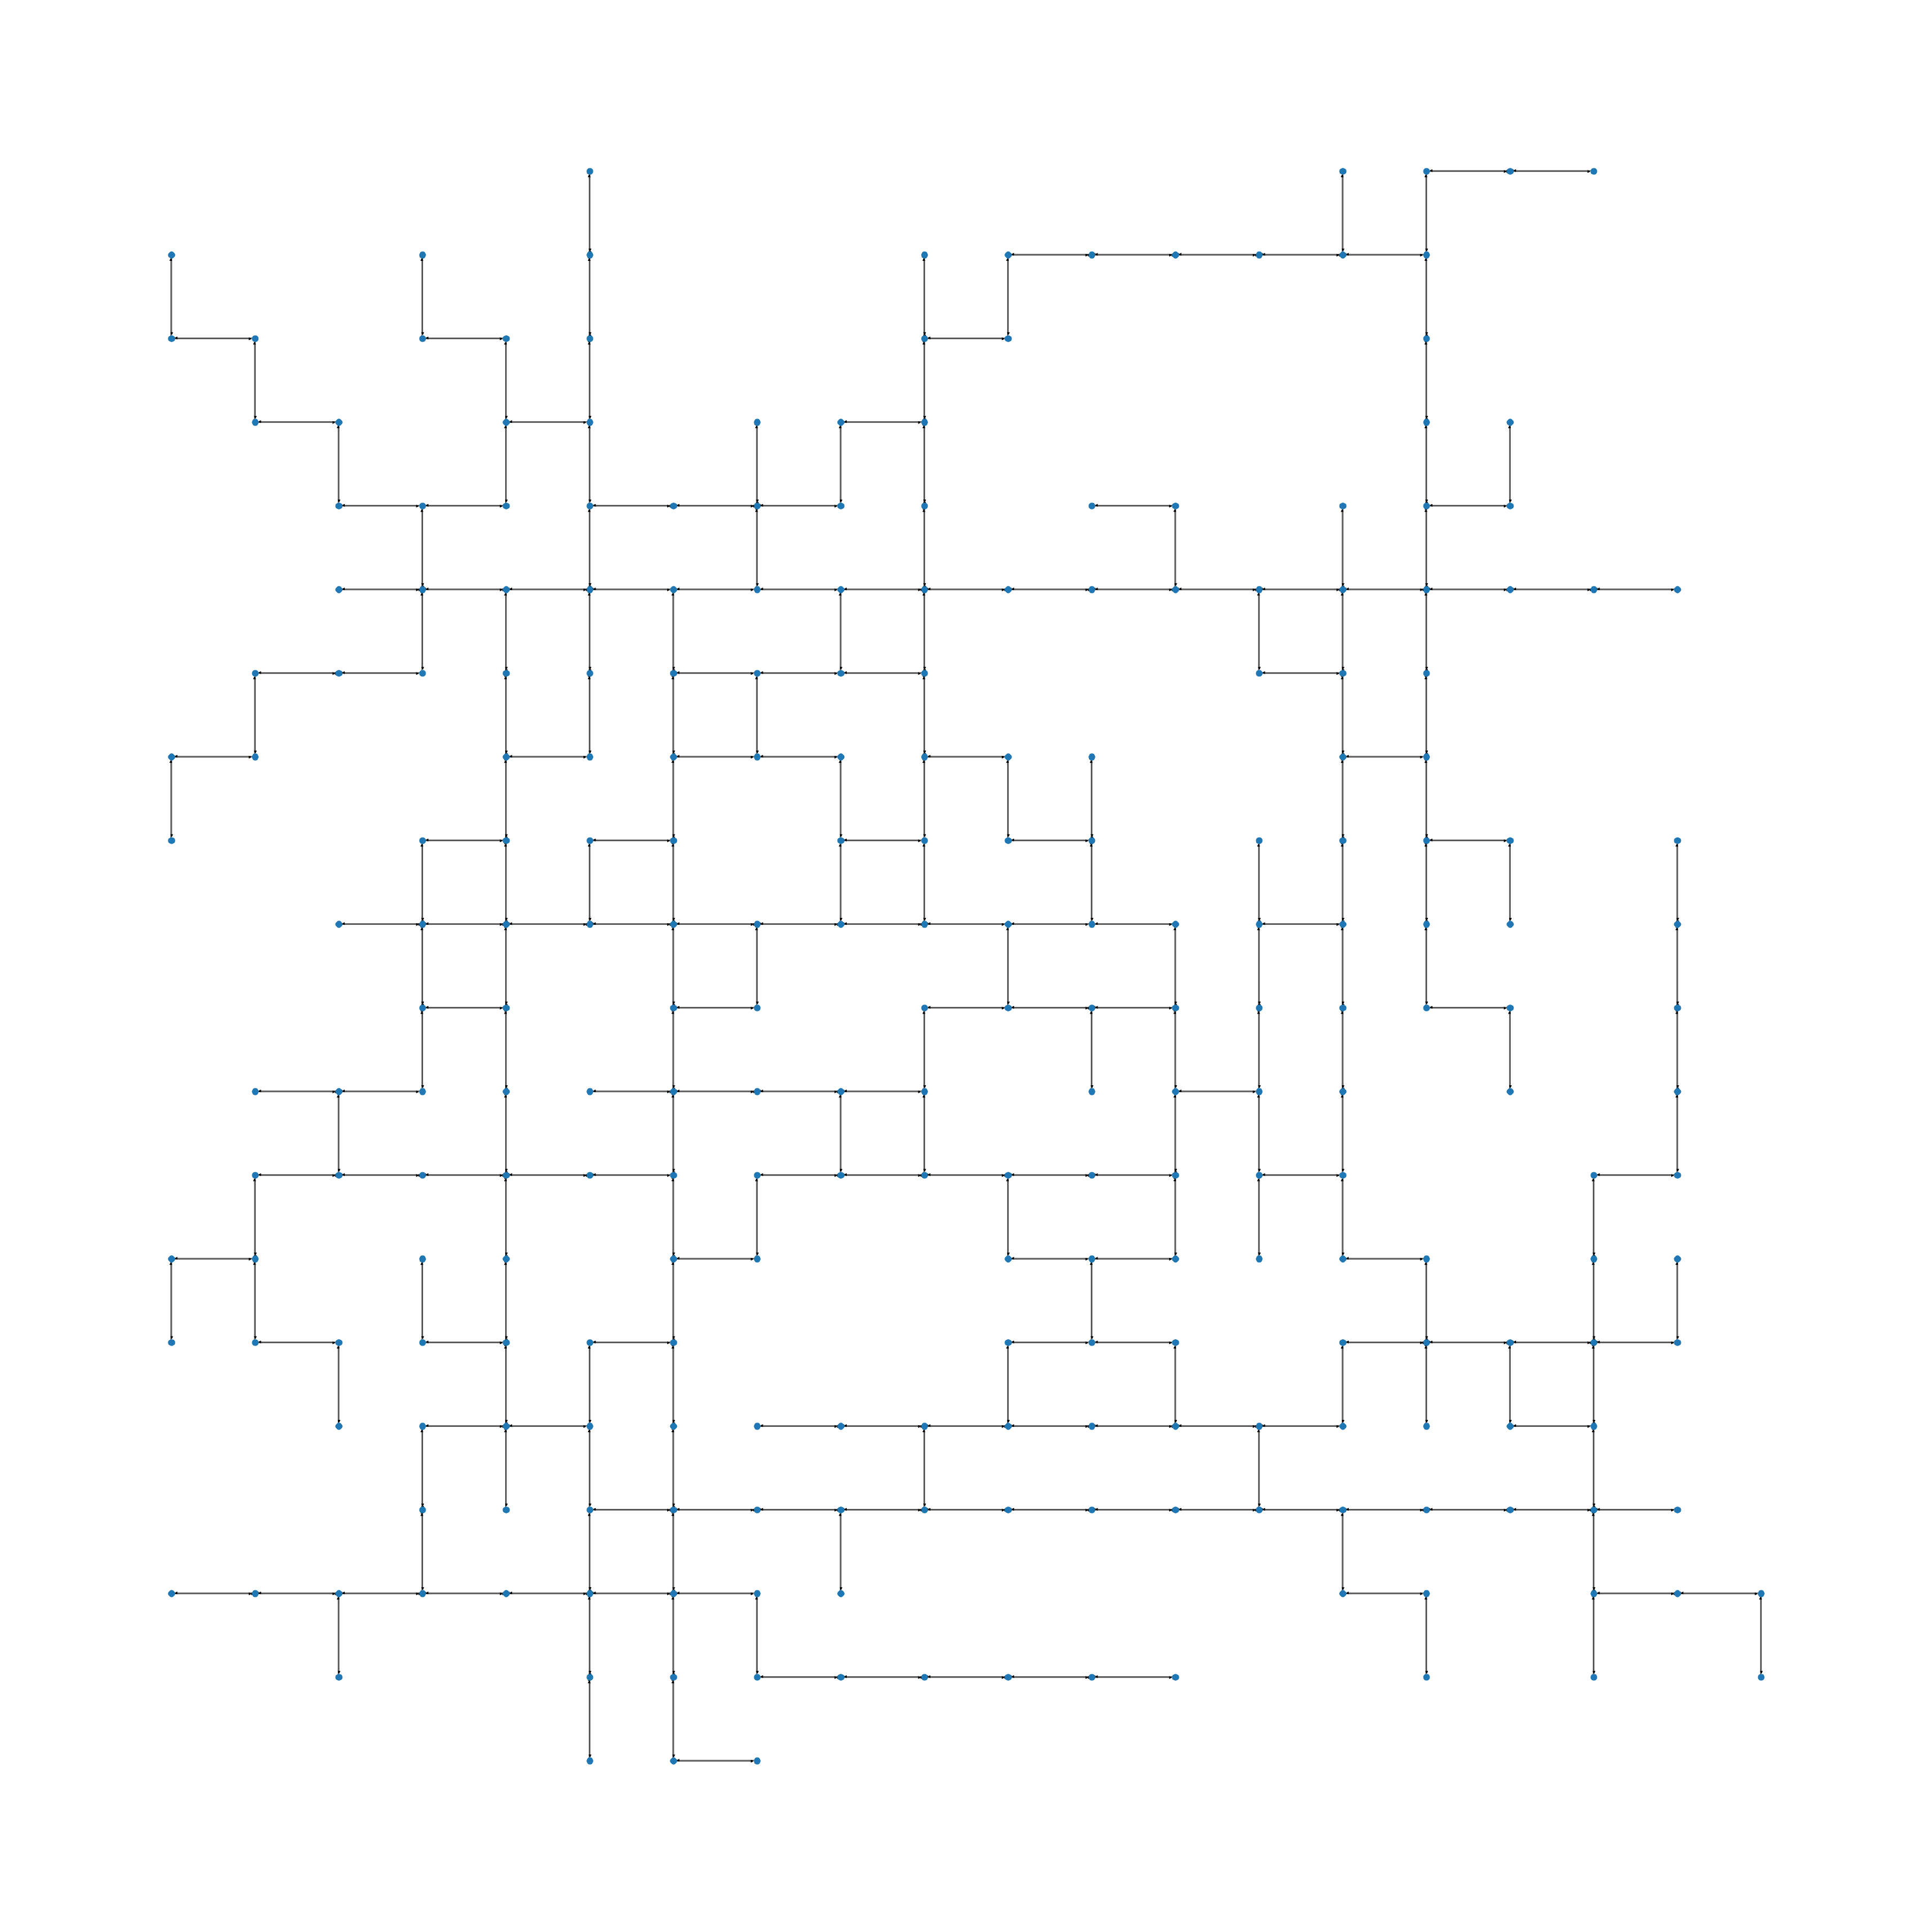

In [7]:
flatlandNetwork.show(jitter=0.01)

##### create a time expanded network

In [8]:
import time

In [9]:
start = time.time()
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=50)
stop = time.time()
print(f'time taken to build the graph: {stop-start}')

time taken to build the graph: 11.51995301246643


In [17]:
TestNetworkTime.connect_sources_and_sink(sources,sinks)

##### Test LP Formulation

test a simple graph

In [18]:
mcflow = MCFlow(TestNetworkTime.graph,len(sources),TestNetworkTime.topology)

Academic license - for non-commercial use only


In [19]:
mcflow.solve()

Optimize a model with 799380 rows, 1204600 columns and 4525800 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 614369 rows and 1191521 columns
Presolve time: 1.39s

Solved with barrier
Solved in 0 iterations and 1.44 seconds
Infeasible model


In [20]:
paths = mcflow.extract_paths()

model not optimized or failed to optimize 
 please use .solve() and check the output


In [21]:
mcflow.check_no_collisions_solution(paths)

True

In [22]:
paths

{}

In [23]:
paths_simple = ([x.split("_")[0] for x in paths[0]])

KeyError: 0

In [ ]:
path_simple